In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [210]:
df = pd.read_csv("datasets/phishing_dataset.csv")

In [212]:
### feature doc in folder does not explain the first column?? "-1" vs. "1"
#checking for data entry values
for d,c in zip(df.dtypes,df.columns):
    if d!="int64":
        print("Found non-integer entries in feature name: %s" % c)

In [213]:
##under the assumption first column is the labels

df.groupby('-1').count()
#we have an imbalance of samples for each class, we must keep that in mind.

,1,1.1,1.2,-1.1,-1.2,-1.3,-1.4,-1.5,1.3,1.4,...,1.9,1.10,-1.11,-1.12,-1.13,-1.14,1.11,1.12,-1.15,-1.16
-1,,,,,,,,,,,,,,,,,,,,,
-1,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,...,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792
1,7262,7262,7262,7262,7262,7262,7262,7262,7262,7262,...,7262,7262,7262,7262,7262,7262,7262,7262,7262,7262


In [700]:
#assigning y and X.
drop_features=['-1']
label='-1'

y = df[label]
X = df.drop(columns=drop_features)

In [701]:
#splitting train, validation, and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.8, random_state=0)

X_train, X_vali, y_train, y_vali = train_test_split(
         X_train, y_train, test_size=0.1, random_state=0)

In [702]:
from sklearn.linear_model import Perceptron
#values were found by looping for 'best' accuracy. Check
alph=0.014
eta=0.030
p = Perceptron(penalty='l1',alpha=alph,max_iter=100, eta0=eta, random_state=0,early_stopping=True)
p.fit(X_train, y_train)

Perceptron(alpha=0.014, class_weight=None, early_stopping=True, eta0=0.03,
           fit_intercept=True, max_iter=100, n_iter_no_change=5, n_jobs=None,
           penalty='l1', random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [703]:
y_pred = p.predict(X_vali)

In [704]:
from sklearn.metrics import accuracy_score, confusion_matrix

#validation checking and refining
print('Accuracy: %.2f' % accuracy_score(y_vali, y_pred))
cm = confusion_matrix(y_vali, y_pred)

cm_df = pd.DataFrame(data=cm,index=['is_ham','is_spam'],columns=['pred_ham','pred_spam'])

Accuracy: 0.79


In [705]:
#confusion matrix: shows false positives, false negatives, true positives and true negatives.
cm_df

,pred_ham,pred_spam
is_ham,54,23
is_spam,24,120


# Metrics

In [706]:
from sklearn.metrics import precision_score
precision_score(y_vali,y_pred)

0.8391608391608392

In [707]:
from sklearn.metrics import recall_score
recall_score(y_vali,y_pred)

0.8333333333333334

In [708]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_vali,y_pred)

0.7673160173160174

In [709]:
#finding correlation matrix of features to features
centered_X_train = X_train-X_train.mean()
corr_mat = pd.DataFrame(index=X_train.columns,columns=X_train.columns,data=np.dot(np.transpose(centered_X_train),centered_X_train)/(len(centered_X_train)-1))

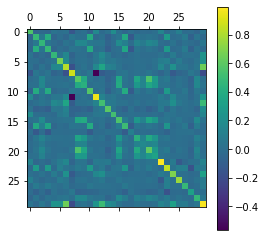

In [710]:
plt.matshow(corr_mat)
cb = plt.colorbar()
plt.show()

In [711]:
#testing on test set
y_pred = p.predict(X_test)

#validation checking and refining
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(data=cm,index=['is_ham','is_spam'],columns=['pred_ham','pred_spam'])
cm_df

Accuracy: 0.85


,pred_ham,pred_spam
is_ham,2273,759
is_spam,588,5224


In [712]:
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

0.8731405649339796
0.8988300068823124
0.8242500957894411


# Testing regularizers hyperparameters

In [713]:
#checking ridge regularizer
alph=0.01
eta=0.01
max_acc=0
for a in range(0,100):
    q = Perceptron(penalty='l1',alpha=alph,max_iter=100, eta0=eta, random_state=0,early_stopping=True)
    q.fit(X_train, y_train)
    y_pred = q.predict(X_test)
    if accuracy_score(y_test, y_pred) > max_acc:
        max_acc=accuracy_score(y_test, y_pred)
        alph_val=alph
    alph+=.001
print(max_acc,alph_val)

0.8488240615106287 0.014000000000000002


In [714]:
#checking ridge regularizer
#constant alph and eta were found by looping.
alph=alph_val
eta=0.001
max_acc=0
for a in range(0,100):
    q = Perceptron(penalty='l1',alpha=alph,max_iter=100, eta0=eta, random_state=0,early_stopping=True)
    q.fit(X_train, y_train)
    y_pred = q.predict(X_test)
    if accuracy_score(y_test, y_pred) > max_acc:
        max_acc=accuracy_score(y_test, y_pred)
        eta_val=eta
    eta+=.001
print(max_acc,eta_val)

0.8506331976481231 0.03000000000000002


In [715]:
#designated hyperparameters
print(alph_val,eta_val)

0.014000000000000002 0.03000000000000002


In [716]:
#checking lasso regularizer
#not a good fit
alph=.001
max_acc=0
for a in range(0,100):
    q = Perceptron(penalty='l2',alpha=alph,max_iter=100, eta0=0.1, random_state=0,early_stopping=True)
    q.fit(X_train, y_train)
    y_pred = q.predict(X_test)
    if accuracy_score(y_test, y_pred) > max_acc:
        max_acc=accuracy_score(y_test, y_pred)
    alph+=.001
print(max_acc)

0.8176164631388512


In [717]:
#checking ridge regularizer + lasso regularizer
#not a good fit
alph=.001
max_acc=0
for a in range(0,100):
    q = Perceptron(penalty='elasticnet',alpha=alph,max_iter=100, eta0=0.1, random_state=0,early_stopping=True)
    q.fit(X_train, y_train)
    y_pred = q.predict(X_test)
    if accuracy_score(y_test, y_pred) > max_acc:
        max_acc=accuracy_score(y_test, y_pred)
    alph+=.001
print(max_acc)

0.8176164631388512


In [718]:
#testing upon the entire dataset to assure that the accuracy is reflective
#and that the partition of the train, test, and validation did not significantly impact the metric
#about the same
y_pred = p.predict(X)

#validation checking and refining
print('Accuracy: %.2f' % accuracy_score(y, y_pred))
cm = confusion_matrix(y, y_pred)

cm_df = pd.DataFrame(data=cm,index=['is_ham','is_spam'],columns=['pred_ham','pred_spam'])
cm_df

Accuracy: 0.85


,pred_ham,pred_spam
is_ham,2861,931
is_spam,743,6519


In [ ]:
#technically psuedoinverse would be another alternative option but I couldn't set the Perceptron with certain weights...